# KSA: Polar Observations and Modelling

## Week X, Class 1 - Ship based in situ ocean observations

This class we are going to learn how to use CTD observations. CTD stands for "Conductivity Temperature Depth" and refers to a collection of electronic instruments that are deployed from a ship, sampling a water column in depth space. A CTD consists of three different sensors:
 - A pressure sensor which measures the pressure of the water column above it. 
 - A temperature sensor.
 - A conductivity sensor, which measures how water conduces electricity, from which we can calculate the salinity of water.

 The CTD is usually attached to a metal rosette, where we have also attached a number of Niskin bottles. These bottles can be closed at different depths to collect water, from which we can take samples to measure different variables. One of the most important samples is used to measure salinity directly in the lab to calibrate the salinity inferred by the conductivity sensor. But water can also be used to measure variables we don't have sensors for (such as iron or other trace metals).

 If you want to learn more about how these measurements are taken, checkout [link](link)!

### Load libraries

Python libraries are ready-to-use collections of code that make our life significantly easier. There are different libraries with different functionalities (e.g. numerical operations, plottting and visualisation). We need to load them in order to use them. 

The semantics to load libraries is usually:
```
import library as name_we_give_it
```
and so we can call functions from the library using the name. For example, the library `numpy` allows us to perform matrices operations, all sorts of algebra and mathematical operations. We can load it, and then calculate the square root of a number, or the sine of another:
```
import numpy as np
np.sqrt(16)
np.sine(90)
```

In [7]:
# Library to explore file systems
import glob
# TEOS-10 (thermodynamic equation of sea water) library
import gsw
# Plotting library
import matplotlib.pyplot as plt
# Matrices/algebra/etc library
import numpy as np
# All-time-favourite library for using "labelled" data
import xarray as xr

We have our CTD profiles stored in the `data` folder. The files come in `netCDF` format, commonly used for oceanographic/meteorologic data. Let's open one file using `xarray`:

In [8]:
CTD_1 = xr.open_dataset('data/in2024_v01010CtdAvg.nc')

Let's take a look at what this created:

In [9]:
CTD_1

<xarray.Dataset>
Dimensions:              (time: 1, pressure: 413, latitude: 1, longitude: 1)
Coordinates:
  * time                 (time) datetime64[ns] 2024-01-14T11:43:29.547003392
  * pressure             (pressure) float64 6.0 7.0 8.0 ... 416.0 417.0 417.6
  * latitude             (latitude) float64 -66.48
  * longitude            (longitude) float64 144.9
Data variables: (12/28)
    woce_date            (time) float64 ...
    woce_time            (time) float64 ...
    temperature          (longitude, latitude, pressure, time) float64 ...
    temperatureFlag      (longitude, latitude, pressure, time) float32 ...
    conductivity         (longitude, latitude, pressure, time) float64 ...
    conductivityFlag     (longitude, latitude, pressure, time) float32 ...
    ...                   ...
    transmissometer      (longitude, latitude, pressure, time) float64 ...
    transmissometerFlag  (longitude, latitude, pressure, time) float32 ...
    fluorometer          (longitude, latitude, pressure, time) float64 ...
    fluorometerFlag      (longitude, latitude, pressure, time) float32 ...
    obs                  (longitude, latitude, pressure, time) float64 ...
    obsFlag              (longitude, latitude, pressure, time) float32 ...
Attributes: (12/14)
    WOCE_Version:    3.0
    Conventions:     COARDS/WOCE/CF-1.5
    History:         Created on 07-May-2024 11:45:34
    Organisation:    CSIRO Marine Research
    Survey:          in2024_v01
    Vessel:          Unknown
    ...              ...
    StartTime:       14-Jan-2024 11:43:29
    BottomTime:      14-Jan-2024 11:53:37
    EndTime:         14-Jan-2024 12:32:12
    WaterDepth:      425.98
    MinAltitude:     Unknown
    PressureBin:     1

`CTD_1` is an `xarray.Dataset` that contains the following information:
1. Dimensions: names and lengths of the "axes" of our dataset. In this case we have:


        dimensions: (time: 1, pressure: 413, latitude: 1, longitude: 1)
        
     This means that we have a time dimension of length 1 which is the date and time the profile was made; a pressure dimension of length 413, meaning 413 depths sampled, and latitude, longitude dimensions of length 1 that tell us where the CTD was taken.

2. Coordinates: the actual values within each dimension. We can see that this profile was taken the 14th of Jan 2024, at 66.48S, 144.9W. 

3. Variables: data from different sensors. The subscript `_2` indicate it is a secondary sensor, which acts as a "failsafe" were the primary instruments to fail in any way.

4. Attributes: "metadata" for the profile. That usually includes who created the file, on what date, etc. Individual variables also have attributes indicating sensor used, units etc.

In [10]:
CTD_1['temperature']

<xarray.DataArray 'temperature' (longitude: 1, latitude: 1, pressure: 413,
                                 time: 1)>
[413 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2024-01-14T11:43:29.547003392
  * pressure   (pressure) float64 6.0 7.0 8.0 9.0 ... 415.0 416.0 417.0 417.6
  * latitude   (latitude) float64 -66.48
  * longitude  (longitude) float64 144.9
Attributes:
    long_name:      Primary Temperature
    standard_name:  Temperature
    units:          deg C (ITS-90)
    data_min:       -1.871768749280698
    data_max:       -0.7049766767733877
    valid_range:    [-10.  40.]
    manufacturer:   Sea-Bird Electronics Inc
    model:          SBE3T
    serialNo:       2751
    unitNo:         1.0

Let's try a couple of ways of visualising this profile! We will start with temperature and salinity, which are two of the most important oceanographic variables in this dataset.

First, lets get temperature and salinity and squeeze them to remove all dimensions of length == 1.

In [19]:
temperature = CTD_1['temperature'].squeeze()
salinity = CTD_1['salinity'].squeeze()

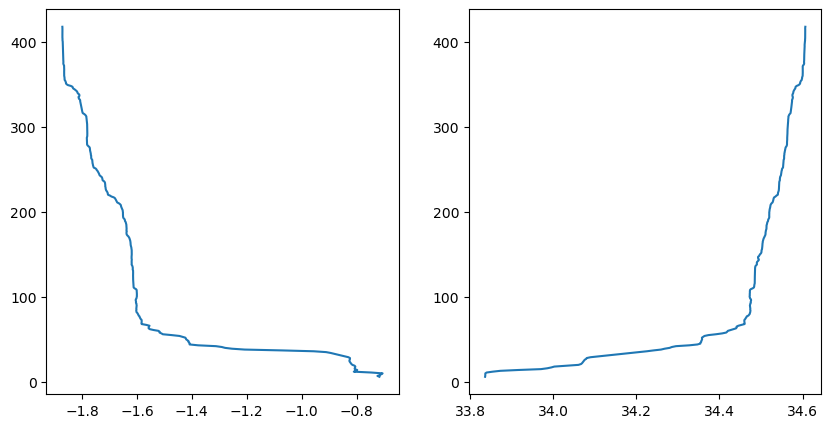

In [25]:
# Create a figure instance
fig = plt.figure(figsize = (10,5))
# Add two axes to the figure, one for temperature and one for salinity
axs = [fig.add_subplot(121), fig.add_subplot(122)]

# Plot temperature
axs[0].plot(temperature, CTD_1['pressure']);
# Plot salinity
axs[1].plot(salinity, CTD_1['pressure']);

#### Notes on the code above
  - `fig.add_subplot(ABC)` adds an axis to our figure, where `A` is the number of rows we want in the figure, `B` the number of columns, and `C` the axis number. So, `121` means the first axis in a 1row x 2col figure, and `122` means the second axis in a 1row x 2col figure.
  - `axs` is a list that contains all the axis in our figure. The first place in that list (`axs[0]`) corresponds to the first axis, the second to the second, etc.

The code above is a minimal plotting example. We can definitely make improvements! for example, right now the yaxis is showing us larger pressures (bottom of the cast) at the top. Flipping it will make it more intuitive to read. We should also add labels to indicate what variable is represented in each axis, add gridlines so that it is easier to identify values at different points of the profile, change the colors, add a title with profile information, etc. 

Tweaking can be one of the easiest ways to loose days to a figure, but it can also make the difference between others understanding what you are showing or not.  


In [34]:
CTD_1['time'].item()

1705232609547003392

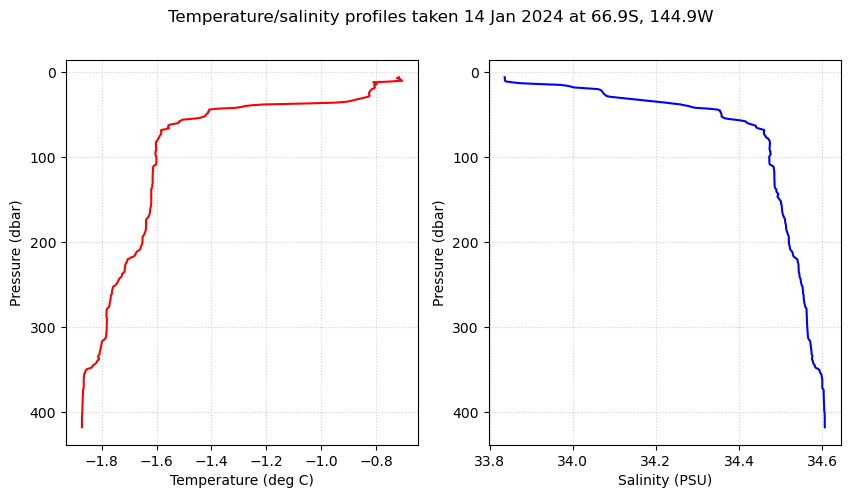

In [41]:
# Create a figure instance
fig = plt.figure(figsize = (10,5))
# Add two axes to the figure, one for temperature and one for salinity
axs = [fig.add_subplot(121), fig.add_subplot(122)]

# Plot temperature (in red)
axs[0].plot(temperature, CTD_1['pressure'],
            color = 'red');
# Plot salinity (in blue)
axs[1].plot(salinity, CTD_1['pressure'],
            color = 'blue');

# Add gridlines
axs[0].grid(linestyle = ':', color = 'lightgrey')
axs[1].grid(linestyle = ':', color = 'lightgrey')
# Flip the axis
axs[0].invert_yaxis()
axs[1].invert_yaxis()
# Add labels to axis
axs[0].set_xlabel('Temperature (deg C)')
axs[1].set_xlabel('Salinity (PSU)')
axs[0].set_ylabel('Pressure (dbar)')
axs[1].set_ylabel('Pressure (dbar)')
# Add a title
fig.suptitle('Temperature/salinity profiles taken 14 Jan 2024 at 66.9S, 144.9W');